<a href="https://colab.research.google.com/github/anu-007/make_more_hashtags/blob/main/mlp/mlp_makemore_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# load data and prepare vocab
import json

tags = []
with open('tags.json', 'r') as file:
  data = json.load(file)
  for d in data:
    tags.append(d[0])

vocab = sorted(list(set(''.join(tags))))
stoi = {s:i+1 for i, s in enumerate(vocab)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [30]:
# build dataset
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline

batch_size = 3
X, Y = [], []
for tag in tags[:3]:
  context = [0] * batch_size
  for ch in tag + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[c] for c in context), '===>', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

... ===> h
..h ===> i
.hi ===> r
hir ===> i
iri ===> n
rin ===> g
ing ===> .
... ===> e
..e ===> n
.en ===> g
eng ===> i
ngi ===> n
gin ===> e
ine ===> e
nee ===> r
eer ===> i
eri ===> n
rin ===> g
ing ===> j
ngj ===> o
gjo ===> b
job ===> s
obs ===> .
... ===> h
..h ===> a
.ha ===> r
har ===> d
ard ===> w
rdw ===> a
dwa ===> r
war ===> e
are ===> .


In [37]:
# test, train, dev split for dataset
batch_size = 3
def build_dataset(tags):
  X, Y = [], []
  for tag in tags:
    context = [0] * batch_size
    for ch in tag + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(tags)
n1 = int(0.8*len(tags))
n2 = int(0.9*len(tags))

Xtr, Ytr = build_dataset(tags[:n1])
Xdev, Ydev = build_dataset(tags[n1:n2])
Xte, Yte = build_dataset(tags[n2:])

torch.Size([6545, 3]) torch.Size([6545])
torch.Size([870, 3]) torch.Size([870])
torch.Size([864, 3]) torch.Size([864])


In [49]:
# create embeddings
vocab_len = max(stoi.values()) + 1

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_len, 2))
W1 = torch.randn((6, 300), generator=g)
B1 = torch.randn(300, generator=g)
W2 = torch.randn((300, vocab_len), generator=g)
B2 = torch.randn(vocab_len, generator=g)
parameters = [C, W1, B1, W2, B2]

In [50]:
for p in parameters:
  p.requires_grad = True

lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [52]:
lri = []
lossi = []
stepi = []
for i in range(30000):
  #minibatch
  ix = torch.randint(0, Xtr.shape[0], (vocab_len,))

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + B1)
  logits = h @ W2 + B2
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 10**-1.2
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  stepi.append(i)
  # lri.append(lre[i])
  lossi.append(loss.item())
print(loss.item())

1.3345823287963867


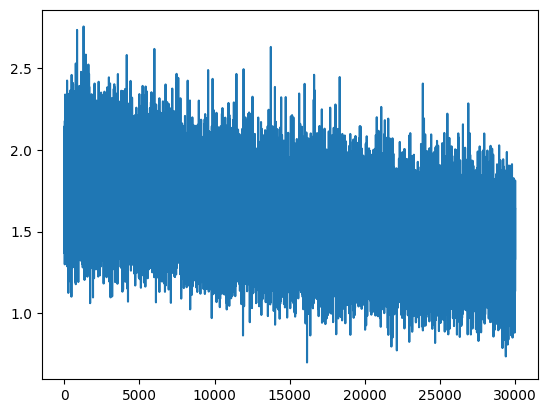

In [53]:
plt.plot(stepi, lossi)

In [54]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6)@W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits, Ytr)
loss.item()

1.3617284297943115

In [55]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6)@W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.5611884593963623

In [56]:
#sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
  out = []
  context = [0] * batch_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + B1)
    logits = h @ W2 + B2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))


Bealentrrpualrustate.
fuccomentL.
digitation.
Animation.
webketorshustatechilition.
cyberationsaconowbies.
softecapility.
weigata.
Communitionds.
zery.
Publicy.
Giceecserexpumity.
Wilareecources.
Gretings.
in.
hurtoractivity.
movicectunityetograpirs.
certy.
movilmFevoutureoleerpuacity.
progeventAffpurity.
